In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('dataset/babyNamesUSYOB-full.csv')

df.head()

,YearOfBirth,Name,Sex,Number
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1858689 entries, 0 to 1858688
Data columns (total 4 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   YearOfBirth  int64 
 1   Name         object
 2   Sex          object
 3   Number       int64 
dtypes: int64(2), object(2)
memory usage: 56.7+ MB


In [5]:
df.isnull().sum()

YearOfBirth    0
Name           0
Sex            0
Number         0
dtype: int64

In [77]:
sex = df.groupby('Sex')['Number'].sum()

sex

Sex
F    168861581
M    171990331
Name: Number, dtype: int64

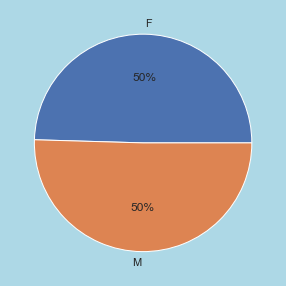

In [78]:
plt.pie(sex, labels=['F', 'M'], autopct='%.0f%%')


plt.show()

### Most popular baby names in 2010 - 2015

In [16]:
sns.set(rc={'figure.figsize' : (8, 5), 'figure.facecolor':'lightblue', 'axes.facecolor':'lightblue'})

def popularNameBarPlot(data, year):
  
    name = data.loc[data['YearOfBirth'] == year]
    top10 = name.sort_values(by='Number', ascending=False)[0:10]
    
    
    plot = sns.barplot(data=top10, x="Name", y="Number")
    for bar in plot.patches:
        plot.annotate(format(int(bar.get_height())),
                  (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()),
                  ha='center', 
                  va='center',
                  size=12,
                  xytext=(0, 8),
                  textcoords='offset points')

    plt.xlabel("Name of Baby", size=14)
    plt.ylabel("Frequency", size=14)
    plt.title('Most Popular Baby Name in %i' %year, size = 18)
    plt.xticks(rotation=45)
    plt.show()

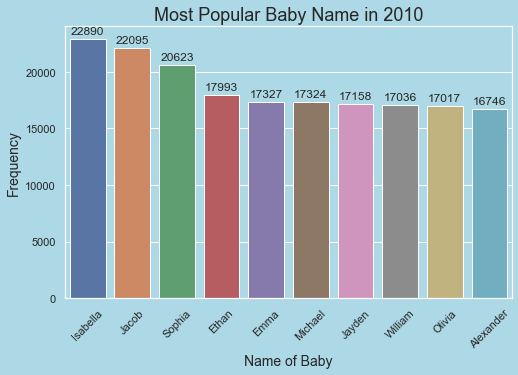

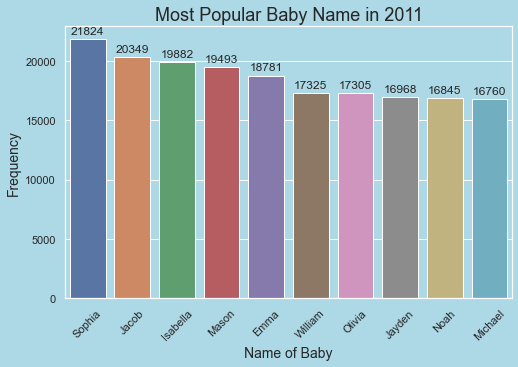

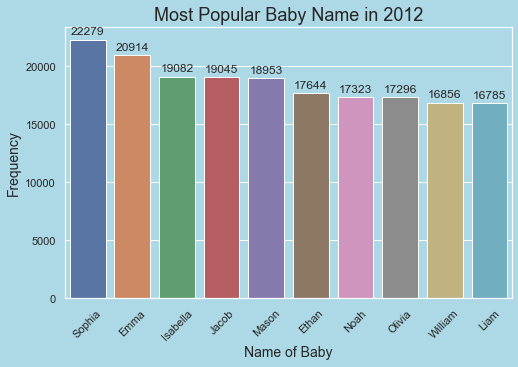

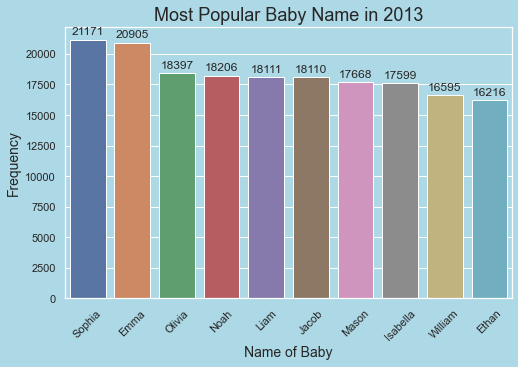

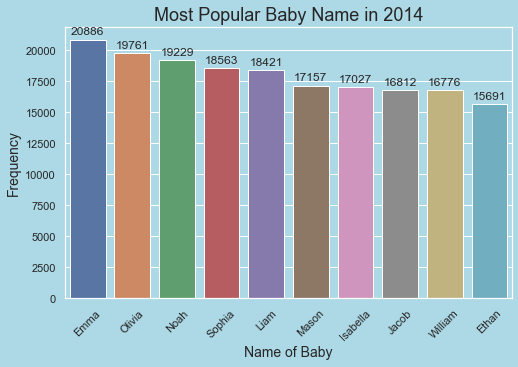

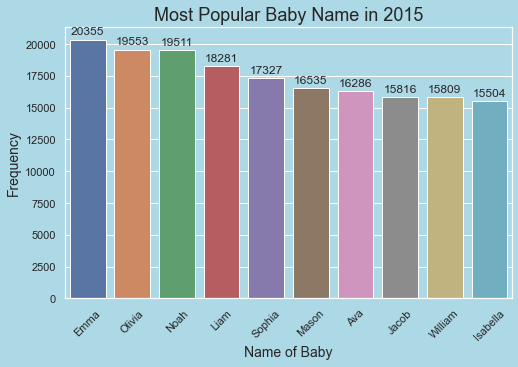

In [17]:
year = [2010, 2011, 2012, 2013, 2014, 2015]
for i in year:
    popularNameBarPlot(df, i)


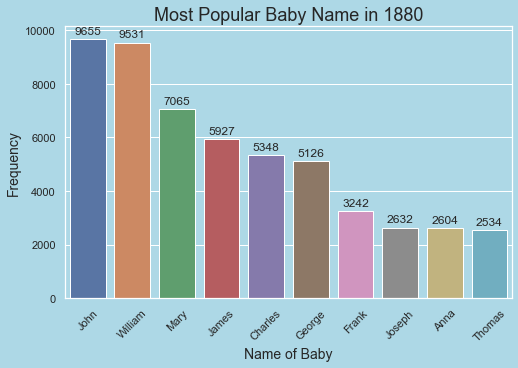

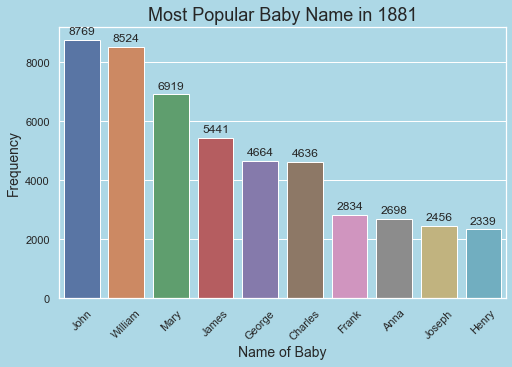

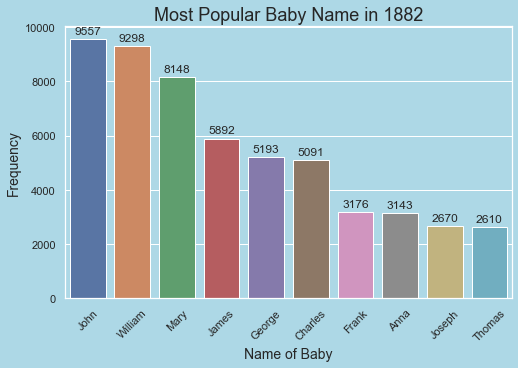

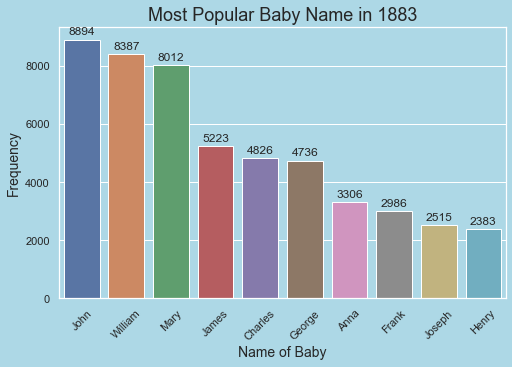

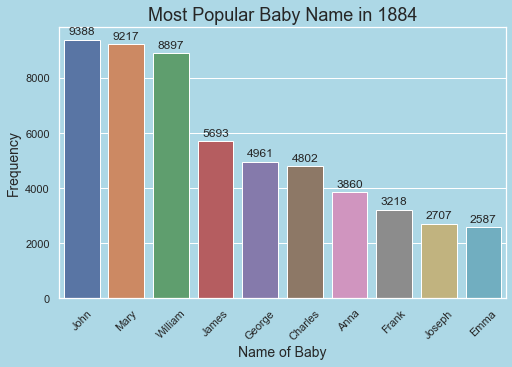

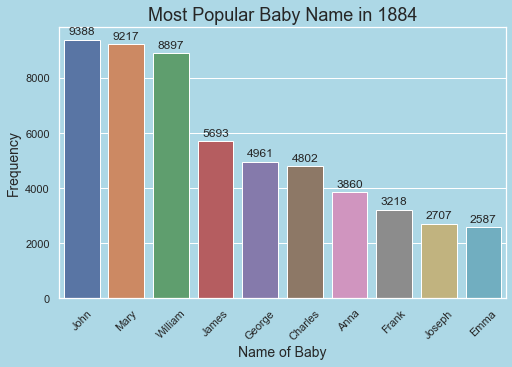

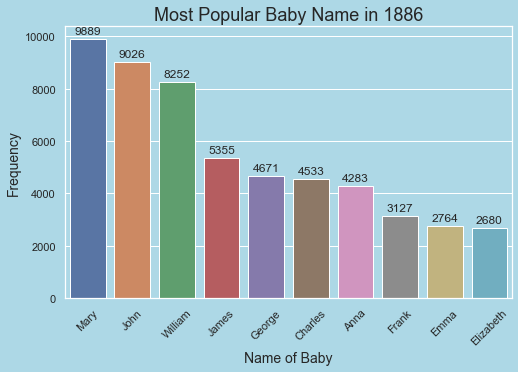

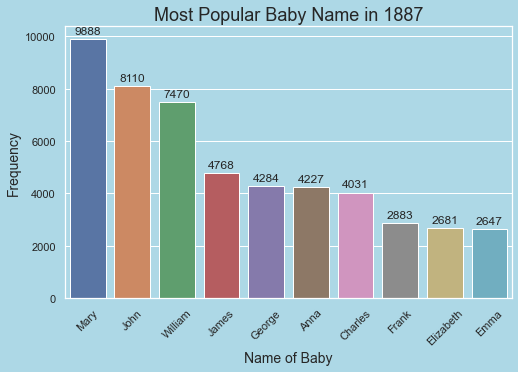

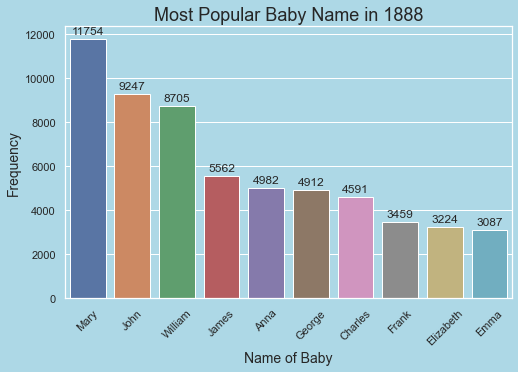

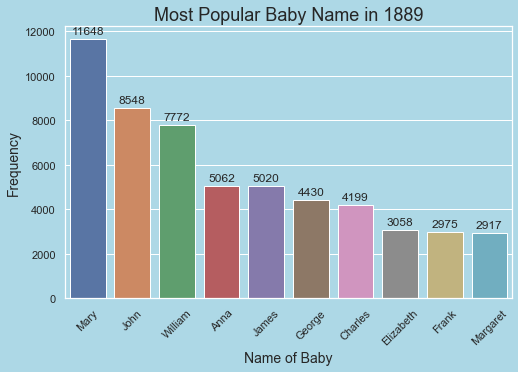

In [23]:
sns.set(rc={'figure.figsize' : (8, 5), 'figure.facecolor':'lightblue', 'axes.facecolor':'lightblue'})
year = [1880, 1881, 1882, 1883, 1884, 1884, 1886, 1887, 1888, 1889]
for i in year:
    popularNameBarPlot(df, i)


### Most popular baby name in 1880 - 1990

In [43]:
def nameOfDecade(data, start, end):
    year1 = [start]
    year2 = pd.Series(range(start-1, end+1))
    
    decade = df.loc[df['YearOfBirth']==start]

    for i in year2:
        x = df.loc[df['YearOfBirth']== i]
        decade = decade.append(x, ignore_index=True)

    return decade

In [44]:
decade = nameOfDecade(df, 1880, 1990)
display(decade.head())
display(decade.tail())

,YearOfBirth,Name,Sex,Number
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746


,YearOfBirth,Name,Sex,Number
1096213,1990,Zeus,M,5
1096214,1990,Ziyad,M,5
1096215,1990,Zoilo,M,5
1096216,1990,Zoran,M,5
1096217,1990,Zvi,M,5


In [45]:
top10_1990 = decade.sort_values(by='Number', ascending=False)[0:200]
top10_1990

,YearOfBirth,Name,Sex,Number
433053,1947,Linda,F,99680
443423,1948,Linda,F,96211
439156,1947,James,M,94763
546606,1957,Michael,M,92726
439157,1947,Robert,M,91646
...,...,...,...,...
231110,1925,Robert,M,60896
220367,1924,Robert,M,60794
470041,1950,David,M,60761
680127,1968,James,M,60730


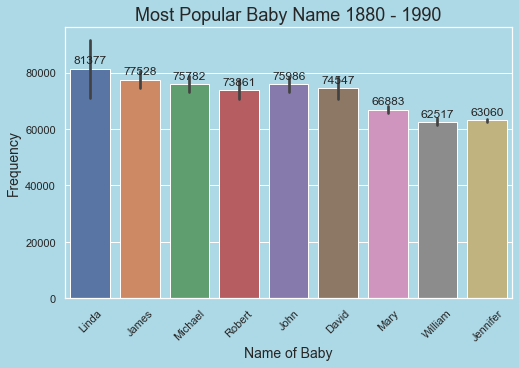

In [47]:
sns.set(rc={'figure.figsize' : (8, 5), 'figure.facecolor':'lightblue', 'axes.facecolor':'lightblue'})
plot = sns.barplot(data=top10_1990, x="Name", y="Number")
for bar in plot.patches:
    plot.annotate(format(int(bar.get_height())),
    (bar.get_x() + bar.get_width() / 2,
    bar.get_height()),
    ha='center', 
    va='center',
    xytext=(0, 8),
    textcoords='offset points')

plt.xlabel("Name of Baby", size=14)
plt.ylabel("Frequency", size=14)
plt.title('Most Popular Baby Name 1880 - 1990', size = 18)
plt.xticks(rotation=45)
plt.show()

### Most popular baby name in 1995 - 2015

In [49]:
decade = nameOfDecade(df, 1995, 2015)
display(decade.head())
display(decade.tail())

,YearOfBirth,Name,Sex,Number
0,1995,Jessica,F,27935
1,1995,Ashley,F,26603
2,1995,Emily,F,24378
3,1995,Samantha,F,21646
4,1995,Sarah,F,21369


,YearOfBirth,Name,Sex,Number
714062,2015,Zykell,M,5
714063,2015,Zyking,M,5
714064,2015,Zykir,M,5
714065,2015,Zyrus,M,5
714066,2015,Zyus,M,5


In [52]:
top10_2015 = decade.sort_values(by='Number', ascending=False)[0:100]
top10_2015

,YearOfBirth,Name,Sex,Number
41833,1994,Michael,M,44462
15754,1995,Michael,M,41404
67832,1995,Michael,M,41404
94047,1996,Michael,M,38364
120735,1997,Michael,M,37545
...,...,...,...,...
120743,1997,Austin,M,25117
94057,1996,Daniel,M,25102
296999,2003,Joshua,M,25087
217748,2001,Emily,F,25052


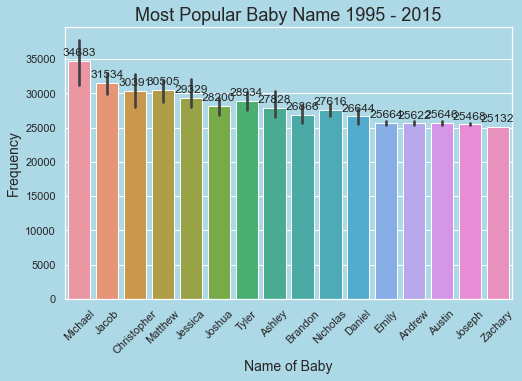

In [53]:
sns.set(rc={'figure.figsize' : (8, 5), 'figure.facecolor':'lightblue', 'axes.facecolor':'lightblue'})
plot = sns.barplot(data=top10_2015, x="Name", y="Number")
for bar in plot.patches:
    plot.annotate(format(int(bar.get_height())),
    (bar.get_x() + bar.get_width() / 2,
    bar.get_height()),
    ha='center', 
    va='center',
    xytext=(0, 8),
    textcoords='offset points')

plt.xlabel("Name of Baby", size=14)
plt.ylabel("Frequency", size=14)
plt.title('Most Popular Baby Name 1995 - 2015', size = 18)
plt.xticks(rotation=45)
plt.show()

### Most popular baby name all the time

In [12]:
top10 = df.sort_values(by='Number', ascending=False)[0:200]
top10

,YearOfBirth,Name,Sex,Number
431053,1947,Linda,F,99680
441423,1948,Linda,F,96211
437156,1947,James,M,94763
544606,1957,Michael,M,92726
437157,1947,Robert,M,91646
...,...,...,...,...
229110,1925,Robert,M,60896
218367,1924,Robert,M,60794
1109677,1991,Michael,M,60783
468041,1950,David,M,60761


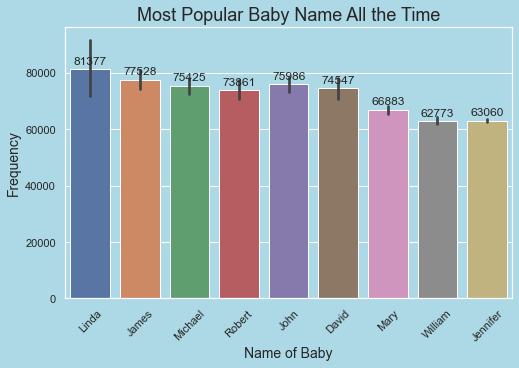

In [22]:
    
sns.set(rc={'figure.figsize' : (8, 5), 'figure.facecolor':'lightblue', 'axes.facecolor':'lightblue'})
plot = sns.barplot(data=top10, x="Name", y="Number")
for bar in plot.patches:
    plot.annotate(format(int(bar.get_height())),
    (bar.get_x() + bar.get_width() / 2,
    bar.get_height()),
    ha='center', 
    va='center',
    xytext=(0, 8),
    textcoords='offset points')

plt.xlabel("Name of Baby", size=14)
plt.ylabel("Frequency", size=14)
plt.title('Most Popular Baby Name All the Time', size = 18)
plt.xticks(rotation=45)
plt.show()

In [18]:
name = ['James', 'Michael', 'Robert', 'John']

popular = df.loc[df['Name']=='Linda']

for i in name:
    x = df.loc[df['Name']==i]
    popular = popular.append(x, ignore_index=True)


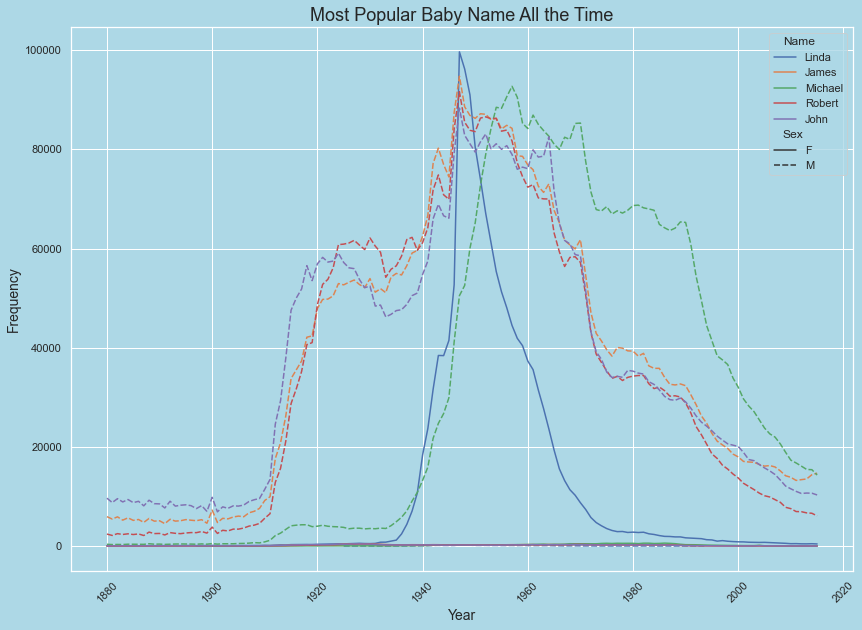

In [19]:
    
sns.set(rc={'figure.figsize' : (14, 10), 'figure.facecolor':'lightblue', 'axes.facecolor':'lightblue'})
plot = sns.lineplot(data=popular, x="YearOfBirth", y="Number", style='Sex', hue='Name')

plt.xlabel("Year", size=14)
plt.ylabel("Frequency", size=14)
plt.title('Most Popular Baby Name All the Time', size = 18)
plt.xticks(rotation=45)
plt.show()


In [80]:
F = df.loc[df['Sex']=='F']
M = df.loc[df['Sex']=='M']

In [83]:
top10_F = F.sort_values(by='Number', ascending=False)[0:200]
top10_M = M.sort_values(by='Number', ascending=False)[0:200]

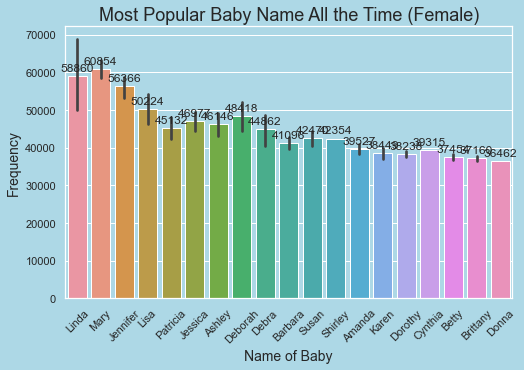

In [84]:
    
sns.set(rc={'figure.figsize' : (8, 5), 'figure.facecolor':'lightblue', 'axes.facecolor':'lightblue'})
plot = sns.barplot(data=top10_F, x="Name", y="Number")
for bar in plot.patches:
    plot.annotate(format(int(bar.get_height())),
    (bar.get_x() + bar.get_width() / 2,
    bar.get_height()),
    ha='center', 
    va='center',
    xytext=(0, 8),
    textcoords='offset points')

plt.xlabel("Name of Baby", size=14)
plt.ylabel("Frequency", size=14)
plt.title('Most Popular Baby Name All the Time (Female)', size = 18)
plt.xticks(rotation=45)
plt.show()

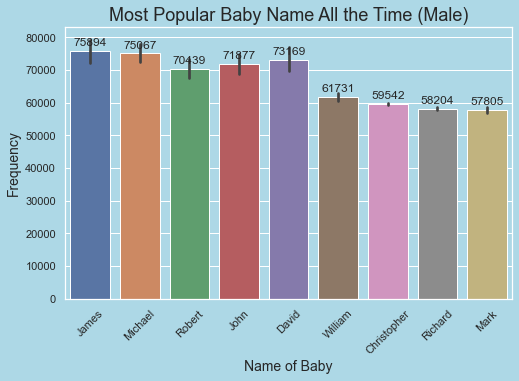

In [86]:
sns.set(rc={'figure.figsize' : (8, 5), 'figure.facecolor':'lightblue', 'axes.facecolor':'lightblue'})
plot = sns.barplot(data=top10_M, x="Name", y="Number")
for bar in plot.patches:
    plot.annotate(format(int(bar.get_height())),
    (bar.get_x() + bar.get_width() / 2,
    bar.get_height()),
    ha='center', 
    va='center',
    xytext=(0, 8),
    textcoords='offset points')

plt.xlabel("Name of Baby", size=14)
plt.ylabel("Frequency", size=14)
plt.title('Most Popular Baby Name All the Time (Male)', size = 18)
plt.xticks(rotation=45)
plt.show()

### Kesimpulan

1. Data yang diolah memiliki 1,8 juta baris dan 4 kolom
2. Perbandingan nama bayi perempuan dan laki-laki adalah 50% : 50%
3. Terdapat peralihan nama yang populer di setiap masa. Pada awal 1880-an, nama yang populaer adalah John, Mary, Willian dan James. Pada akhir 2010-an, nama yang populer adalah Emma, Olivia, Noah, dan Sophia.
4. Untuk bayi perempuan, nama yang populer sepanjang masa adalah Linda, Mary, Jennifer dan Lisa. Sedangankan, untuk nama bayi laki - laki yang populer adalah James, Michael, Robert dan John.
5. Pada akhirnya, nama yang paling populer sepanjang masa adalah, Linda, James, Michael, Robert.